# Feature extraction and Pre process

In [ ]:
import nltk               
import spacy              
import gensim             
import sklearn            
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt   



---


# Running Models


In [ ]:
import nltk               
import spacy              
import gensim             
import sklearn            
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# For NRSM

this section showing result for without code switching, emoji and object columns in sevaral configurations: 

*   all columns
*   all columns: scaled
*   dropping colsum>=6000
*   same, scaled
*   dropping colsum>=4000
*   same, scaled

all of these done for NB,RF and SVM.






# with all columns 


In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.LSRP12<df.LSRP12.quantile()).replace({True:1, False:2})

x = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(x.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000000,0.50,0.0,0.941818,0.040000,0.684211,0.020010,0.019990,0.020011,0.839355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000115,0.70,0.8,0.933602,0.048358,0.912281,0.012497,0.012483,0.012498,0.012768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000230,0.40,0.4,0.905508,0.066567,0.972299,0.005539,0.005533,0.005541,0.005659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000345,0.55,0.1,0.894070,0.074328,0.923684,0.901597,0.011093,0.011106,0.011347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000460,0.50,0.0,0.929382,0.049552,0.898026,0.016670,0.016653,0.016675,0.147768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy :", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy scaled:", nb_acc)

Naive Bayes accuracy : 0.4869631901840491
Naive Bayes accuracy scaled: 0.49003067484662577


##SVM

In [ ]:
#Unscaled
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1, cache_size=2000) 
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.48504601226993865


In [ ]:
#Scaled
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1, cache_size=2000) 
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.7174079754601227


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9513036809815951


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.9516871165644172


# dropping columns = sum zero > 6000


In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.LSRP12<df.LSRP12.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
   
    if (count>=6000):
       #print('Count of zeros in column ', column_name, ' is : ', count)
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8692 non-null   int64  
 1   polarity              8692 non-null   float64
 2   subjectivity          8692 non-null   float64
 3   flesch_reading_ease   8692 non-null   float64
 4   flesch_kincaid_grade  8692 non-null   float64
 5   lexical_density       8692 non-null   float64
 6   topic_0               8692 non-null   float64
 7   topic_1               8692 non-null   float64
 8   topic_2               8692 non-null   float64
 9   topic_3               8692 non-null   float64
 10  topic_4               8692 non-null   float64
 11  topic_5               8692 non-null   float64
 12  topic_6               8692 non-null   float64
 13  topic_7               8692 non-null   float64
 14  topic_8               8692 non-null   float64
 15  topic_9              

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()

Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,0.50,0.0,0.941818,0.040000,0.684211,0.020010,0.019990,0.020011,0.839355,...,0.031915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000115,0.70,0.8,0.933602,0.048358,0.912281,0.012497,0.012483,0.012498,0.012768,...,0.031915,0.015625,0.030303,0.002404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000230,0.40,0.4,0.905508,0.066567,0.972299,0.005539,0.005533,0.005541,0.005659,...,0.021277,0.015625,0.015152,0.000000,0.000617,0.027778,0.044444,0.021739,0.006897,0.000000
3,0.000345,0.55,0.1,0.894070,0.074328,0.923684,0.901597,0.011093,0.011106,0.011347,...,0.031915,0.015625,0.030303,0.002404,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000
4,0.000460,0.50,0.0,0.929382,0.049552,0.898026,0.016670,0.016653,0.016675,0.147768,...,0.010638,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004149


##Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.4824611845888442
Naive Bayes accuracy: 0.48763657274295574


##SVM

In [ ]:
#Unscaled
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.45543415756181715


In [ ]:
#Scaled
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.7124784358826912


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.968558282208589


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.9662576687116564


# drop 4000>

In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.LSRP12<df.LSRP12.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
   
    if (count>=4000):
      # print('Count of zeros in column ', column_name, ' is : ', count)
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()


Scaled Dataset Using MinMaxScaler


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.50,0.0,0.941818,0.040000,0.684211,0.020010,0.019990,0.020011,0.839355,...,0.020283,0.020402,0.020158,0.019916,0.020023,0.000960,0.058824,0.001817,0.031915,0.000000
1,0.000115,0.70,0.8,0.933602,0.048358,0.912281,0.012497,0.012483,0.012498,0.012768,...,0.012666,0.012740,0.012588,0.012413,0.889511,0.001344,0.080882,0.003633,0.031915,0.000000
2,0.000230,0.40,0.4,0.905508,0.066567,0.972299,0.005539,0.005533,0.005541,0.005659,...,0.241820,0.005647,0.005579,0.005467,0.719026,0.003841,0.102241,0.007266,0.021277,0.000617
3,0.000345,0.55,0.1,0.894070,0.074328,0.923684,0.901597,0.011093,0.011106,0.011347,...,0.011257,0.011324,0.011186,0.011025,0.011112,0.001536,0.124183,0.002725,0.031915,0.000000
4,0.000460,0.50,0.0,0.929382,0.049552,0.898026,0.016670,0.016653,0.016675,0.147768,...,0.016899,0.016996,0.016793,0.016581,0.723914,0.001344,0.066176,0.004541,0.010638,0.000000


##Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)


X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy:", nb_acc)

Naive Bayes accuracy: 0.5583668775158137
Naive Bayes accuracy: 0.5595169637722829


#SVM

In [ ]:
#Unscaled
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.4263803680981595


In [ ]:
#Scaled
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)

svm_clf = SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM accuracy:", svm_acc)

SVM accuracy: 0.7089723926380368


##Random Forest

In [ ]:
#unscaled

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9513036809815951


In [ ]:
#scaled

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the random forest classifier to the training data
rfc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rfc.predict(X_test)

# calculate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:(scaled)", accuracy)

Accuracy:(scaled) 0.9723926380368099


# Ensemble

In [ ]:
df = pd.read_csv('/content/feature_dataset_8692.csv')
y =(df.LSRP12<df.LSRP12.quantile()).replace({True:1, False:2})



for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
   
    if (count>=6000):
       df.drop(columns =column_name, inplace = True )

df = df.drop(['Mach', 'LSRP12','LSRP2','NRSM','english_text','topic_distributions','word_tokens','part_of_speech','word_freq_dist'], axis=1)  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8692 non-null   int64  
 1   polarity              8692 non-null   float64
 2   subjectivity          8692 non-null   float64
 3   flesch_reading_ease   8692 non-null   float64
 4   flesch_kincaid_grade  8692 non-null   float64
 5   lexical_density       8692 non-null   float64
 6   topic_0               8692 non-null   float64
 7   topic_1               8692 non-null   float64
 8   topic_2               8692 non-null   float64
 9   topic_3               8692 non-null   float64
 10  topic_4               8692 non-null   float64
 11  topic_5               8692 non-null   float64
 12  topic_6               8692 non-null   float64
 13  topic_7               8692 non-null   float64
 14  topic_8               8692 non-null   float64
 15  topic_9              

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
 
scaler = MinMaxScaler()
 
x_scaled = scaler.fit_transform(df.to_numpy())
x_scaled = pd.DataFrame(x_scaled)
 
print("Scaled Dataset Using MinMaxScaler")
x_scaled.head()



X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)


nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgboost = xgb.XGBClassifier(random_state=42)

ensemble = VotingClassifier(estimators=[('nb', nb), ('rf', rf), ('dt', dt), ('xgboost', xgboost)], voting='hard')


ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Scaled Dataset Using MinMaxScaler
Accuracy: 0.9946319018404908
Classification Report:
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1238
           2       1.00      0.99      0.99      1370

    accuracy                           0.99      2608
   macro avg       0.99      0.99      0.99      2608
weighted avg       0.99      0.99      0.99      2608



Confusion Matrix:
 [[1233    5]
 [   9 1361]]


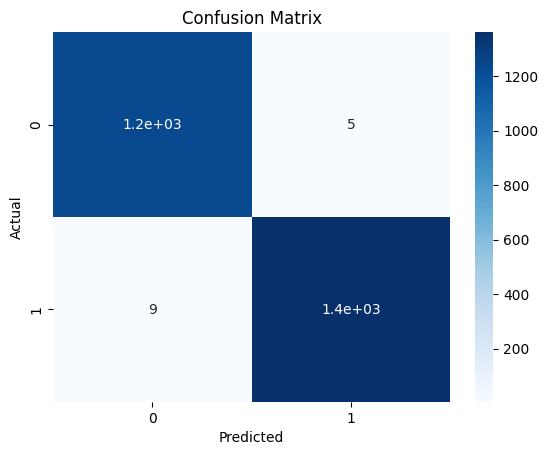

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


corr matrix and statistical analysis 

In [ ]:
df_mach = pd.concat([x, y], axis = 1)


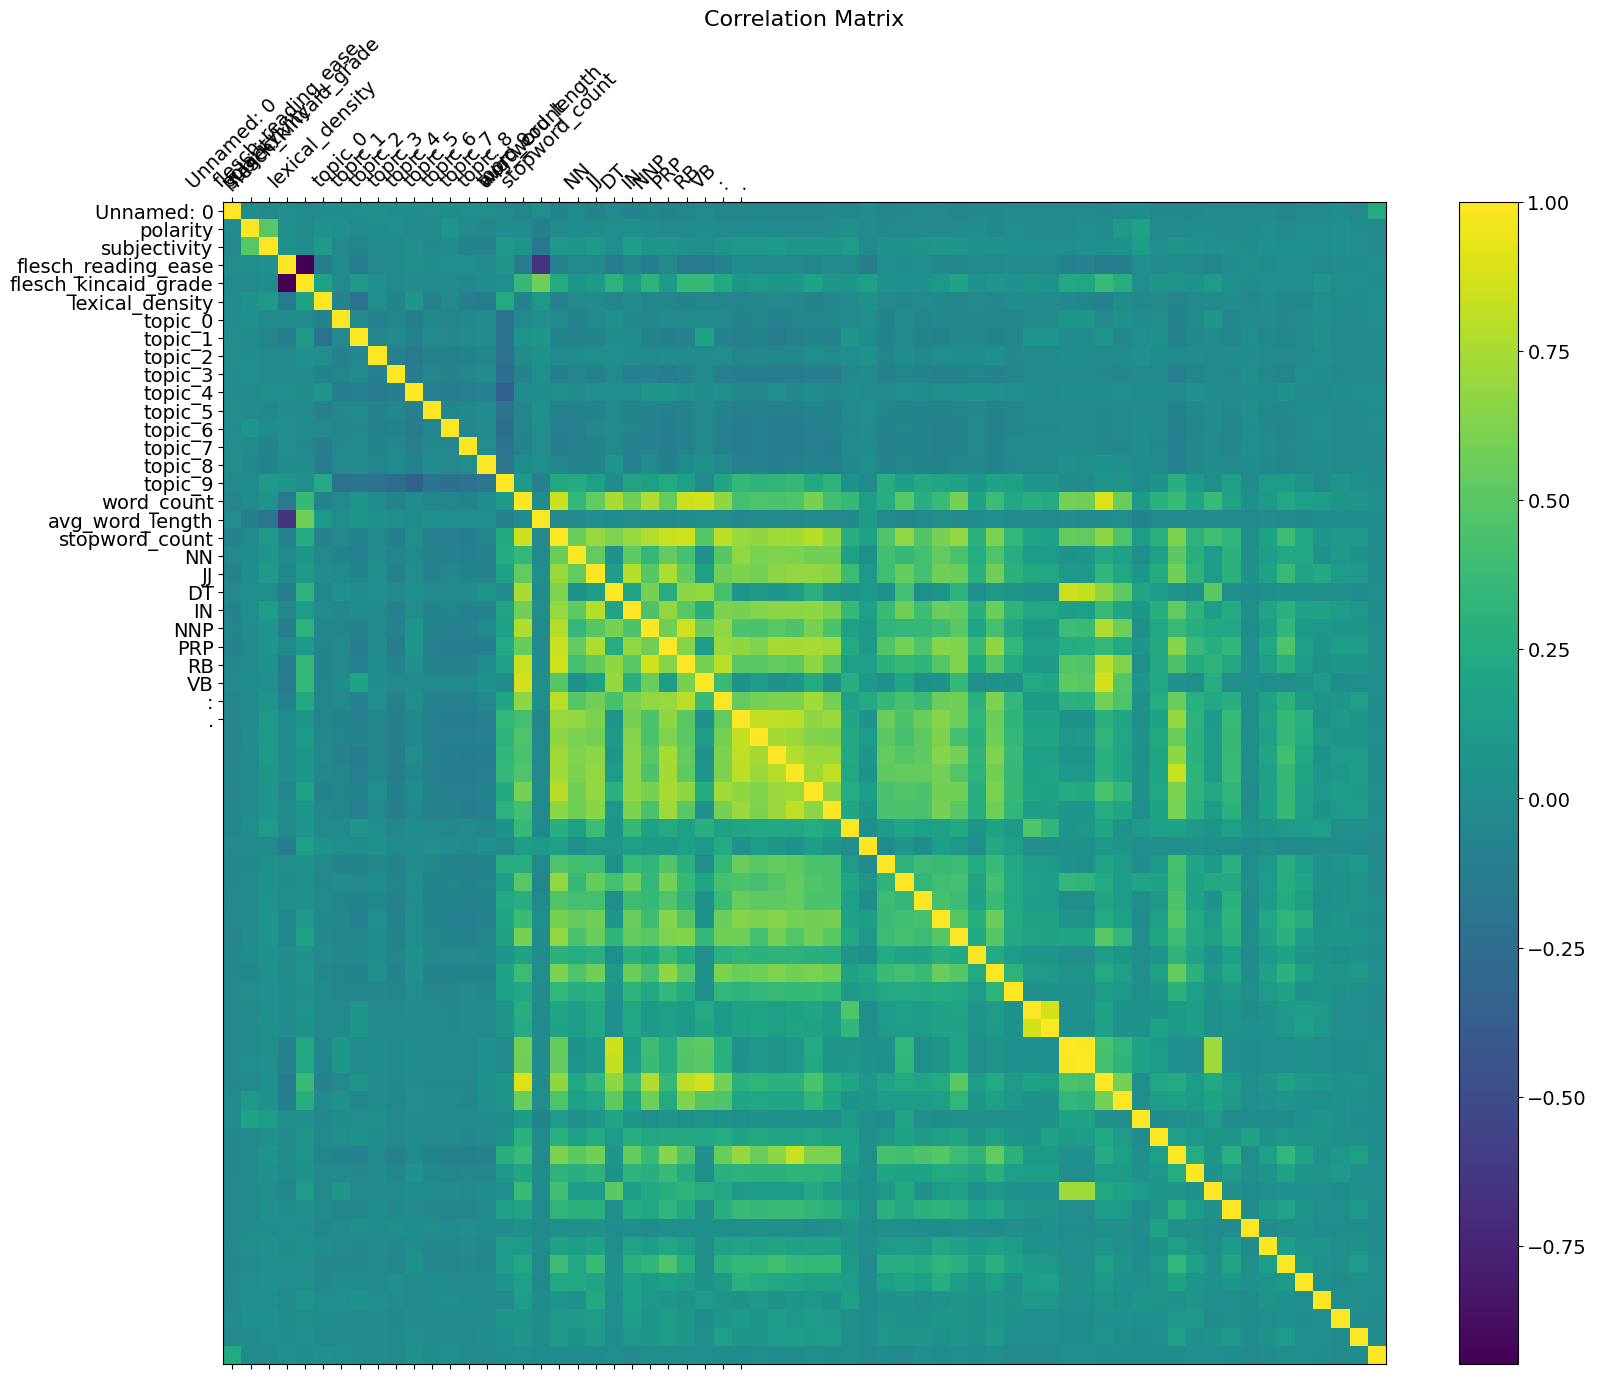

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df_mach.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);